<a href="https://colab.research.google.com/github/AkshathaNapanda/Mental_Health_Prediction/blob/main/Mental_Health_Prediction_of_Children_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB

#Stacking
from mlxtend.classifier import StackingClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mhp_Children.csv to mhp_Children.csv


In [ ]:
train_df = pd.read_csv('mhp_Children.csv')
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(80, 26)
             Age  Unnamed: 24
count  80.000000          0.0
mean   14.637500          NaN
std     1.552815          NaN
min    10.000000          NaN
25%    14.000000          NaN
50%    15.000000          NaN
75%    16.000000          NaN
max    16.000000          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         80 non-null     object 
 1   Age                          80 non-null     int64  
 2   Gender                       80 non-null     object 
 3   Screen_time                  80 non-null     object 
 4   social _media _platforms     80 non-null     object 
 5   AnxietyAboutMissingUpdates   80 non-null     object 
 6   ActivitiesOnSocialMedia      80 non-null     object 
 7   TimeOfDayUsage               80 non-null     object 
 8   CheckFrequency               80 n

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                             Total  Percent
Unnamed: 24                     80      1.0
Name                             0      0.0
Age                              0      0.0
RelaxationActivities             0      0.0
TalkAboutFeelings                0      0.0
ComparisonToOthers               0      0.0
FeelingIsolated                  0      0.0
TroubleSleeping                  0      0.0
HeadachesEyeStrain               0      0.0
FrequencyOfSadness               0      0.0
StressAnxietyAfterUse            0      0.0
InPersonVsOnlineInteraction      0      0.0
PressureToRespond                0      0.0
UseDuringMeals                   0      0.0
NeglectResponsibilities          0      0.0
AcademicImpact                   0      0.0
ConcentrationAfterUse            0      0.0
DifficultyStopping               0      0.0
CheckFrequency                   0      0.0
TimeOfDayUsage                   0      0.0
ActivitiesOnSocialMedia          0      0.0
AnxietyAboutMissingUpdates      

In [ ]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()


Saving mhp_Children.csv to mhp_Children (1).csv


In [ ]:
import pandas as pd

# Assuming the file name is mhp_Children.csv
file_path = 'mhp_Children.csv'
data = pd.read_csv(file_path)

# Print all column names
print(data.columns)


Index(['Name', 'Age', 'Gender', 'Screen_time  ', 'social _media _platforms ',
       'AnxietyAboutMissingUpdates', 'ActivitiesOnSocialMedia  ',
       'TimeOfDayUsage', 'CheckFrequency  ', 'DifficultyStopping',
       'ConcentrationAfterUse', 'AcademicImpact', 'NeglectResponsibilities',
       'UseDuringMeals', 'PressureToRespond', 'InPersonVsOnlineInteraction',
       'StressAnxietyAfterUse', 'FrequencyOfSadness', 'HeadachesEyeStrain',
       'TroubleSleeping', 'FeelingIsolated', 'ComparisonToOthers',
       'TalkAboutFeelings', 'RelaxationActivities', 'Unnamed: 24',
       'Treatment'],
      dtype='object')


In [ ]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Name', 'Age', 'Gender', 'Screen_time  ', 'social _media _platforms ',
       'AnxietyAboutMissingUpdates', 'ActivitiesOnSocialMedia  ',
       'TimeOfDayUsage', 'CheckFrequency  ', 'DifficultyStopping',
       'ConcentrationAfterUse', 'AcademicImpact', 'NeglectResponsibilities',
       'UseDuringMeals', 'PressureToRespond', 'InPersonVsOnlineInteraction',
       'StressAnxietyAfterUse', 'FrequencyOfSadness', 'HeadachesEyeStrain',
       'TroubleSleeping', 'FeelingIsolated', 'ComparisonToOthers',
       'TalkAboutFeelings', 'RelaxationActivities',
       'Treatment'],

floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

Error: Feature Name not recognized.
Error: Feature Gender not recognized.
Error: Feature Screen_time   not recognized.
Error: Feature social _media _platforms  not recognized.
Error: Feature AnxietyAboutMissingUpdates not recognized.
Error: Feature ActivitiesOnSocialMedia   not recognized.
Error: Feature TimeOfDayUsage not recognized.
Error: Feature CheckFrequency   not recognized.
Error: Feature DifficultyStopping not recognized.
Error: Feature ConcentrationAfterUse not recognized.
Error: Feature AcademicImpact not recognized.
Error: Feature NeglectResponsibilities not recognized.
Error: Feature UseDuringMeals not recognized.
Error: Feature PressureToRespond not recognized.
Error: Feature InPersonVsOnlineInteraction not recognized.
Error: Feature StressAnxietyAfterUse not recognized.
Error: Feature FrequencyOfSadness not recognized.
Error: Feature HeadachesEyeStrain not recognized.
Error: Feature TroubleSleeping not recognized.
Error: Feature FeelingIsolated not recognized.
Error: Fea

,Name,Age,Gender,Screen_time,social _media _platforms,AnxietyAboutMissingUpdates,ActivitiesOnSocialMedia,TimeOfDayUsage,CheckFrequency,DifficultyStopping,...,StressAnxietyAfterUse,FrequencyOfSadness,HeadachesEyeStrain,TroubleSleeping,FeelingIsolated,ComparisonToOthers,TalkAboutFeelings,RelaxationActivities,Unnamed: 24,Treatment
0,Rakshith P,15,Male,3-4 hours,"Facebook, Instagram, Snapchat, TikTok, Twitter...",Sometimes,"Messaging friends, Posting photos/videos, Liki...","Morning, Afternoon, Evening, Late night",Often,Often,...,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,No,"Playing games, Listening to music",NaN,No
1,Kshama,13,Female,5-6 hours,Instagram,Sometimes,Messaging friends,Evening,Always,Sometimes,...,Sometimes,Sometimes,Sometimes,Never,Sometimes,Rarely,No,Listening to music,NaN,No
2,Kavya,10,Female,3-4 hours,"Snapchat, YouTube",Rarely,Watching videos,"Evening, Late night",Never,Sometimes,...,Sometimes,Rarely,Sometimes,Often,Sometimes,Sometimes,No,"Reading, Talking to someone",NaN,Yes
3,Navya,14,Female,1-2 hours,"Instagram, Twitter",Sometimes,"Posting photos/videos, Playing games",Late night,Sometimes,Often,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,Never,Yes,"Playing games, Talking to someone",NaN,No
4,Chaya Sri K,14,Female,3-4 hours,"Instagram, Snapchat, What’s app",Sometimes,"Messaging friends, Posting photos/videos, Watc...","Morning, Evening, Late night",Often,Sometimes,...,Never,Sometimes,Never,Never,Often,Sometimes,No,"Listening to music, Talking to someone",NaN,No


In [ ]:
gender = train_df['Gender'].unique()
print(gender)

['Male' 'Female']


In [ ]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['male' 'female']


In [ ]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [ ]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Name ['Abin', "Adlin Prakash D'Souza", 'Aishwarya ', 'Ajith', 'Ajith kumar', 'Akbar ', 'Akshatha ', 'Akshatha S ', 'Anujna', 'Anup kumar', 'Anusha', 'Anushree', 'Ashika Shetty', 'Ayishath Sadeeda', 'Bhavik Gowda ', 'Bhoomika ', 'Chaya Sri K ', 'Chethan', 'Chiranya', 'Deepika', 'Deepthi', 'Dhanush Shetty', 'Drithi', 'Gavin', 'Harshita B M', 'Hemanth B R', 'Himani gs', 'Hrithik gowda ', 'Kavan Napanda', 'Kavya', 'Kavyashree ', 'Keshav L ', 'Kshama ', 'M Mehika Rai', 'Manav Alva', 'Navya', 'Neelam ', 'Nireeksha ', 'Pallavi ', 'Prajna', 'Pruthvi', 'Rahul', 'Rakshith P', 'Rani', 'Rathna Kumar', 'Ruchitha ', 'Sahana', 'Sai Manjunath Rajesh Walke', 'Saimaa Rai', 'Sanjana ', 'Shamitha S Hegde', 'Shashank', 'Sherlin Dsouza', 'Shilpa Kamat ', 'Shilpak', 'Shimal', 'Shobhitha BK ', 'Shraddha ', 'Shravya', 'Shreyas ', 'Sinchana', 'Sonam', 'Sonika', 'Soumya Patel', 'Soundarya ', 'Sourabh', 'Suha', 'Sukesh', 'Sushila', 'TANUSH BALARAJ ALVA ', 'Taniya ', 'Thejas D Shetty ', 'Tilak', 'VARSHA SHET

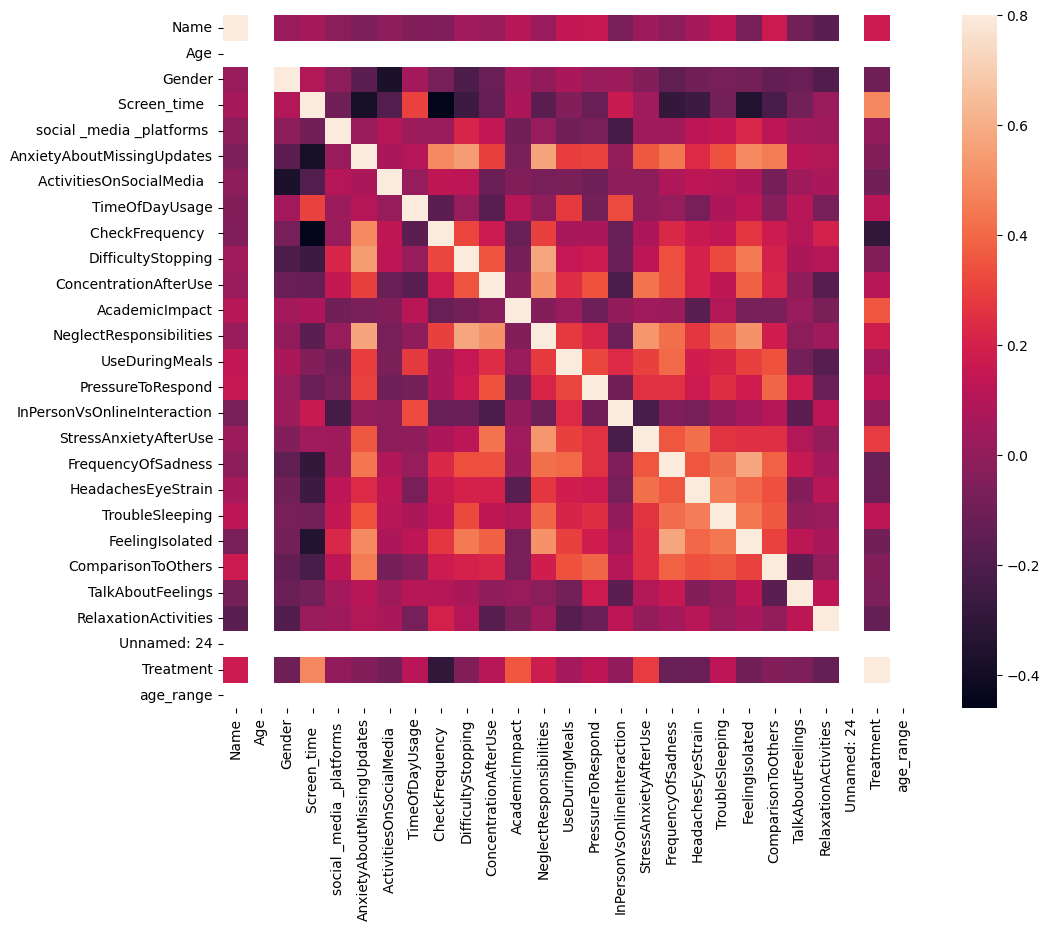

In [ ]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

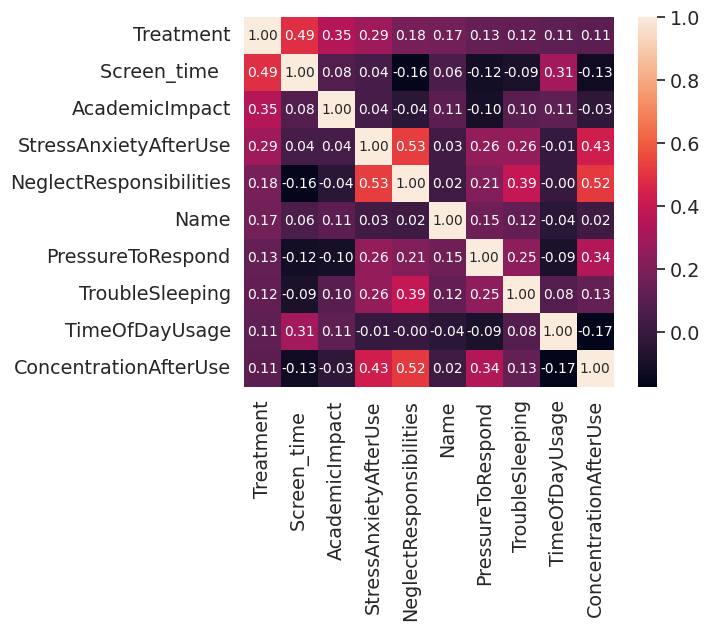

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Treatment')['Treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

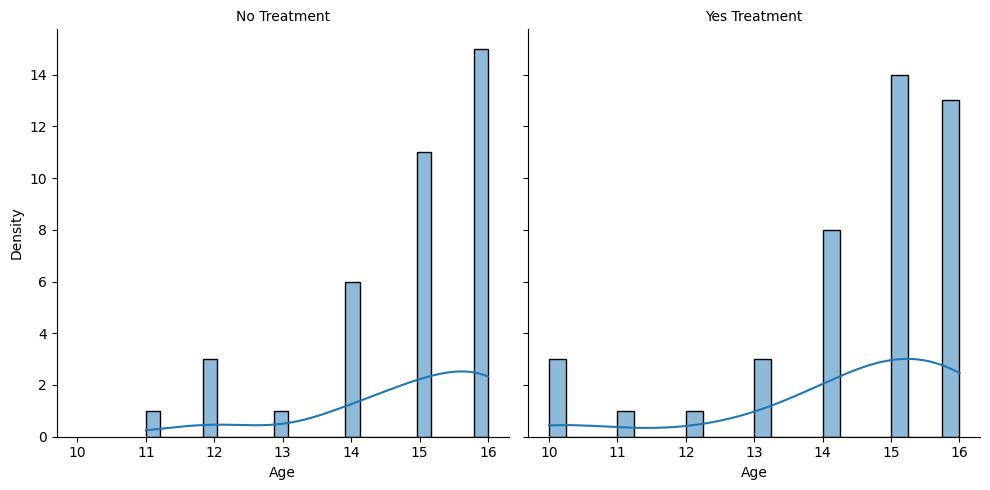

In [ ]:
g = sns.FacetGrid(data, col='Treatment', height=5)
g = g.map(sns.histplot, "Age", kde=True, bins=24)

# Add titles and labels
g.set_axis_labels("Age", "Density")
g.set_titles(col_template="{col_name} Treatment")
plt.show()

<ipython-input-9-f360a8d28814>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="Treatment", data=data, palette="Set2")


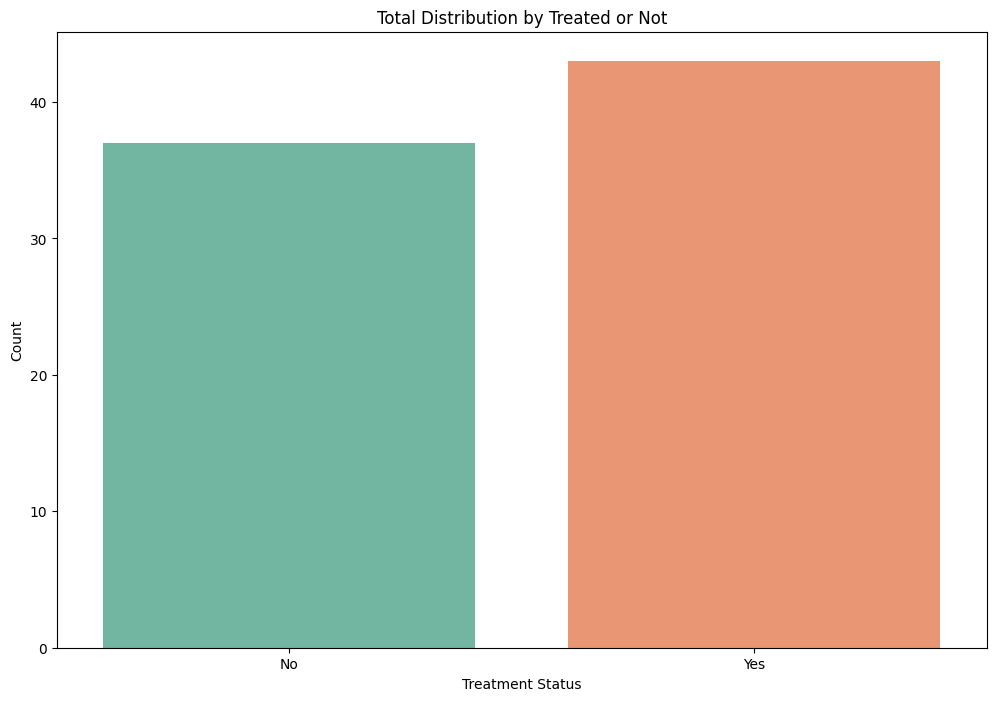

In [ ]:
plt.figure(figsize=(12,8))
g = sns.countplot(x="Treatment", data=data, palette="Set2")

# Optional: Customize the x-axis labels if needed (you mentioned labels for Gender but we don't have that here)
# Assuming you want to label the 'Treatment' categories differently, you can modify as follows:
# labels = ["No Treatment", "Treatment"]
# g.set_xticklabels(labels)

# Add title and labels
plt.title('Total Distribution by Treated or Not')
plt.xlabel('Treatment Status')
plt.ylabel('Count')

# Show the plot
plt.show()

<ipython-input-17-742b48766b6b>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


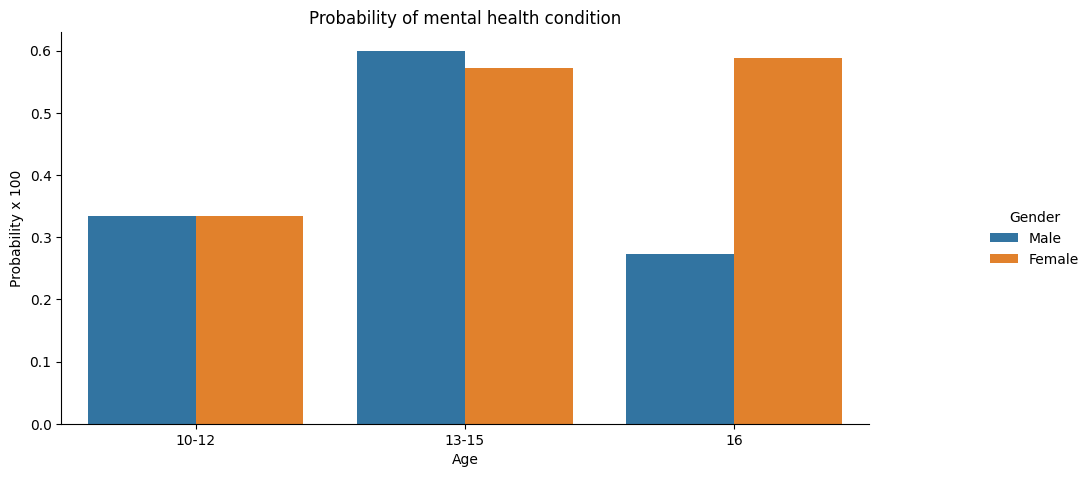

In [ ]:
labelDict = {
    'label_age_range': [ '10-12', '13-15', '16'],
    'label_Gender': ['Male', 'Female', 'Other']
}

# Assuming 'Age' is in single years, we'll create age ranges
train_df['age_range'] = pd.cut(train_df['Age'], bins=[10, 12, 15, 16], labels=labelDict['label_age_range'])

# Map the treatment column to a binary format for easier plotting
train_df['treatment'] = train_df['Treatment'].map({'Yes': 1, 'No': 0})

# Step 5: Plot the data
g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(labelDict['label_age_range'])

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


['Sometimes' 'Rarely' 'Often' 'Never' 'Always']


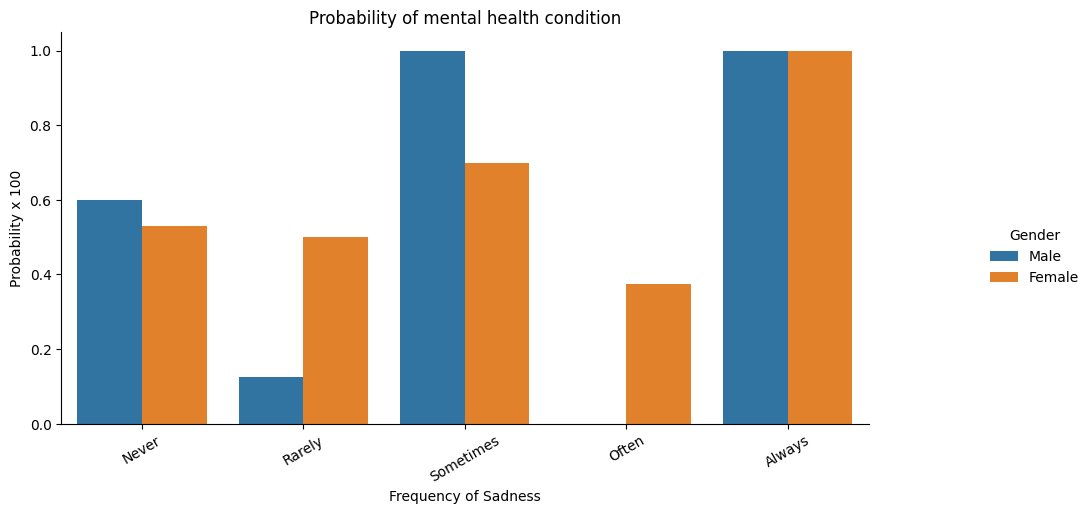

In [ ]:
labelDict = {
    'label_FrequencyOfSadness': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'label_Gender': ['Male', 'Female', 'Other']
}

# Inspect unique values in the FrequencyOfSadness column
print(train_df['FrequencyOfSadness'].unique())

# Map the treatment column to a binary format for easier plotting
train_df['treatment'] = train_df['Treatment'].map({'Yes': 1, 'No': 0})

# Step 5: Plot the data
g = sns.catplot(x="FrequencyOfSadness", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(labelDict['label_FrequencyOfSadness'], rotation=30)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Frequency of Sadness')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

['Sometimes' 'Never' 'Often' 'Rarely' 'Always']


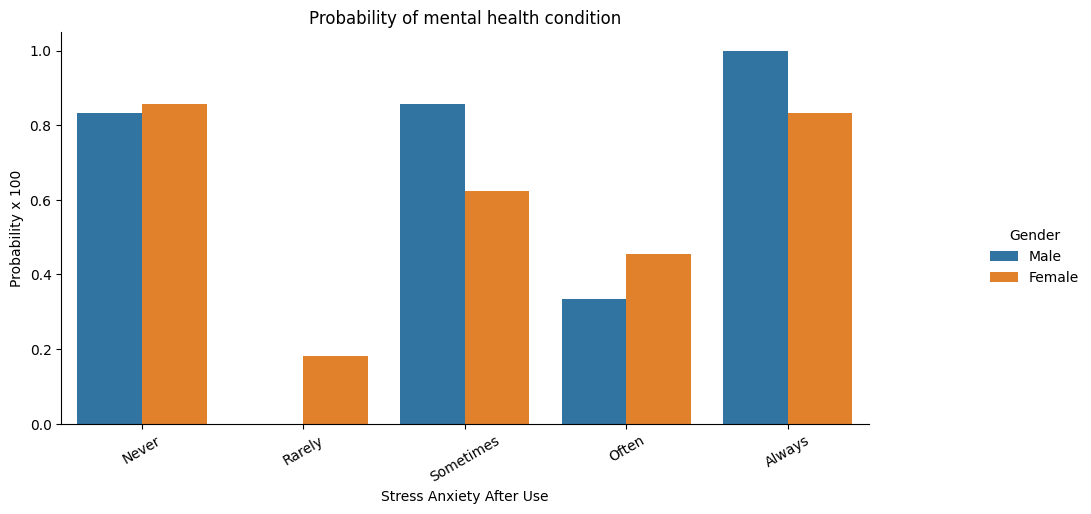

In [ ]:
labelDict = {
    'label_StressAnxietyAfterUse': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'label_Gender': ['Male', 'Female', 'Other']
}

# Inspect unique values in the FrequencyOfSadness column
print(train_df['StressAnxietyAfterUse'].unique())

# Map the treatment column to a binary format for easier plotting
train_df['treatment'] = train_df['Treatment'].map({'Yes': 1, 'No': 0})

# Step 5: Plot the data
g = sns.catplot(x="StressAnxietyAfterUse", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(labelDict['label_StressAnxietyAfterUse'], rotation=30)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Stress Anxiety After Use')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

['Sometimes' 'Rarely' 'Often' 'Never' 'Always']


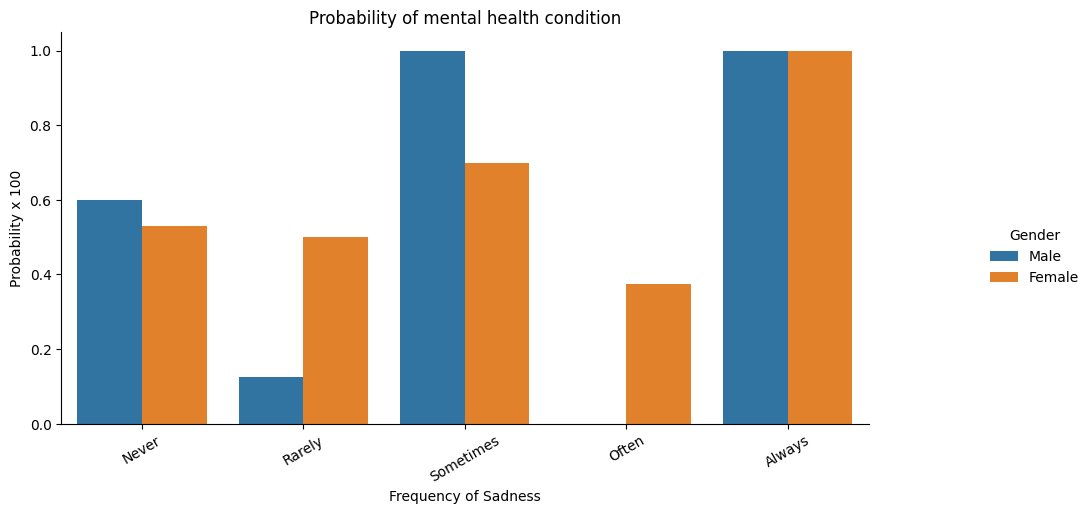

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])

# Display the first few rows to verify the changes
train_df.head()

# Step 5: Define FrequencyOfSadness labels and other labels
labelDict = {
    'label_FrequencyOfSadness': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    'label_Gender': ['Male', 'Female', 'Other']
}

# Inspect unique values in the FrequencyOfSadness column
print(train_df['FrequencyOfSadness'].unique())

# Map the treatment column to a binary format for easier plotting
train_df['treatment'] = train_df['Treatment'].map({'Yes': 1, 'No': 0})

# Step 6: Plot the data
g = sns.catplot(x="FrequencyOfSadness", y="treatment", hue="Gender", data=train_df, kind="bar", errorbar=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(labelDict['label_FrequencyOfSadness'], rotation=30)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Frequency of Sadness')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Name,Age,Gender,Screen_time,social _media _platforms,AnxietyAboutMissingUpdates,ActivitiesOnSocialMedia,TimeOfDayUsage,CheckFrequency,DifficultyStopping,...,FeelingIsolated,ComparisonToOthers,TalkAboutFeelings,RelaxationActivities,Unnamed: 24,Treatment,age_range,treatment,care_options,benefits
0,Rakshith P,0.833333,Male,3-4 hours,"Facebook, Instagram, Snapchat, TikTok, Twitter...",Sometimes,"Messaging friends, Posting photos/videos, Liki...","Morning, Afternoon, Evening, Late night",Often,Often,...,Sometimes,Sometimes,No,"Playing games, Listening to music",NaN,No,13-15,0,No,Not sure
1,Kshama,0.500000,Female,5-6 hours,Instagram,Sometimes,Messaging friends,Evening,Always,Sometimes,...,Sometimes,Rarely,No,Listening to music,NaN,No,13-15,0,Yes,Not sure
2,Kavya,0.000000,Female,3-4 hours,"Snapchat, YouTube",Rarely,Watching videos,"Evening, Late night",Never,Sometimes,...,Sometimes,Sometimes,No,"Reading, Talking to someone",NaN,Yes,NaN,1,Yes,No
3,Navya,0.666667,Female,1-2 hours,"Instagram, Twitter",Sometimes,"Posting photos/videos, Playing games",Late night,Sometimes,Often,...,Rarely,Never,Yes,"Playing games, Talking to someone",NaN,No,13-15,0,No,Yes
4,Chaya Sri K,0.666667,Female,3-4 hours,"Instagram, Snapchat, What’s app",Sometimes,"Messaging friends, Posting photos/videos, Watc...","Morning, Evening, Late night",Often,Sometimes,...,Often,Sometimes,No,"Listening to music, Talking to someone",NaN,No,13-15,0,No,Yes


In [ ]:
# Step 1: Upload the dataset to Colab
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded.keys())))

# Step 2: Define the feature columns based on the dataset
feature_cols = [
    'Age', 'Gender', 'Screen_time  ', 'AnxietyAboutMissingUpdates',
    'DifficultyStopping', 'StressAnxietyAfterUse', 'FrequencyOfSadness',
    'HeadachesEyeStrain', 'TroubleSleeping', 'FeelingIsolated'
]

# Define the target variable
X = df[feature_cols]
y = df['Treatment']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Step 3: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = {}

# Example of how to add accuracy score to methodDict
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define base estimators
estimators = [
    ('lr', LogisticRegression()),
    ('svm', SVC())
]

# Define the Stacking Classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the model
stacking_clf.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Store the result in the methodDict
methodDict['Stacking'] = accuracy

# Display the accuracy
print(f"Stacking Classifier Accuracy: {accuracy}")


Saving mhp_Children.csv to mhp_Children (6).csv
Stacking Classifier Accuracy: 0.6666666666666666


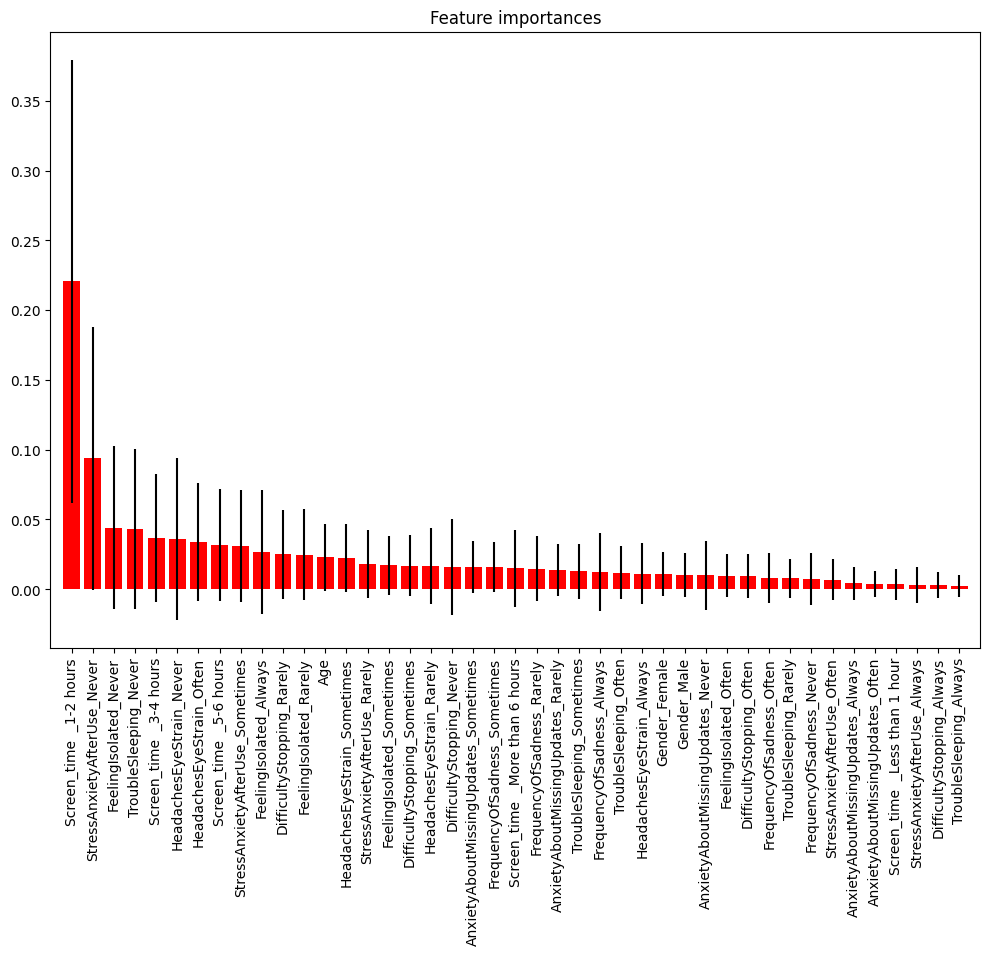

In [ ]:
feature_cols = [
    'Age', 'Gender', 'Screen_time  ', 'AnxietyAboutMissingUpdates',
    'DifficultyStopping', 'StressAnxietyAfterUse', 'FrequencyOfSadness',
    'HeadachesEyeStrain', 'TroubleSleeping', 'FeelingIsolated'
]

# Define the target variable
X = df[feature_cols]
y = df['Treatment']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Step 3: Build a forest and compute the feature importances
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Get the correct labels after converting to dummies
labels = X.columns

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

Saving mhp_Children.csv to mhp_Children (9).csv
Accuracy: 0.8333333333333334
Null accuracy:
 Treatment
0    13
1    11
Name: count, dtype: int64
Percentage of ones: 0.4583333333333333
Percentage of zeros: 0.5416666666666667
True: [0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1]
Pred: [0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0]


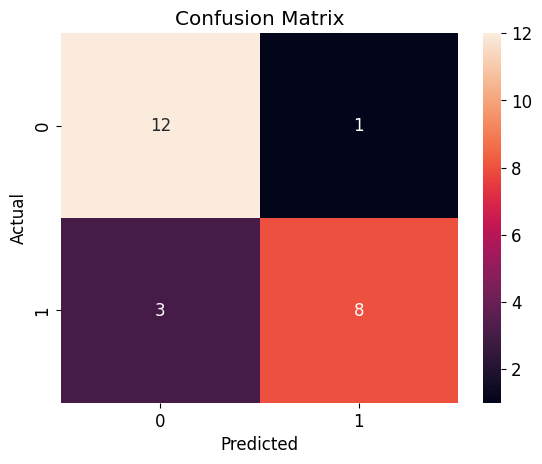

Classification Accuracy: 0.8333333333333334
Classification Error: 0.16666666666666663
False Positive Rate: 0.07692307692307693
Precision: 0.8888888888888888
AUC Score: 0.8251748251748253
Cross-validated AUC: 0.8993055555555556
First 10 predicted responses:
 [0 0 0 1 0 0 1 0 0 1]
First 10 predicted probabilities of class membership:
 [[0.912 0.088]
 [0.704 0.296]
 [0.504 0.496]
 [0.068 0.932]
 [0.952 0.048]
 [0.616 0.384]
 [0.1   0.9  ]
 [0.66  0.34 ]
 [0.596 0.404]
 [0.288 0.712]]


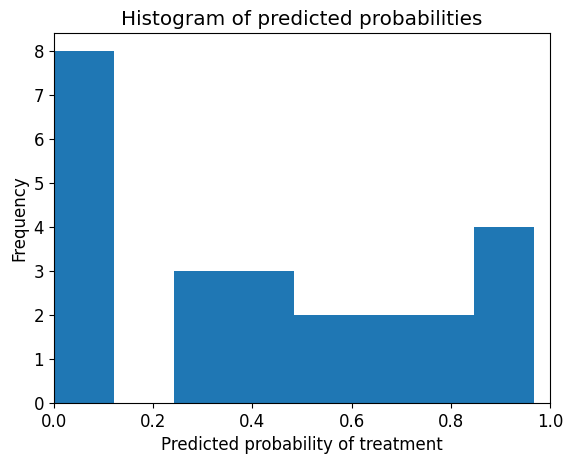

First 10 predicted probabilities:
 [0.088 0.296 0.496 0.932 0.048 0.384 0.9   0.34  0.404 0.712]


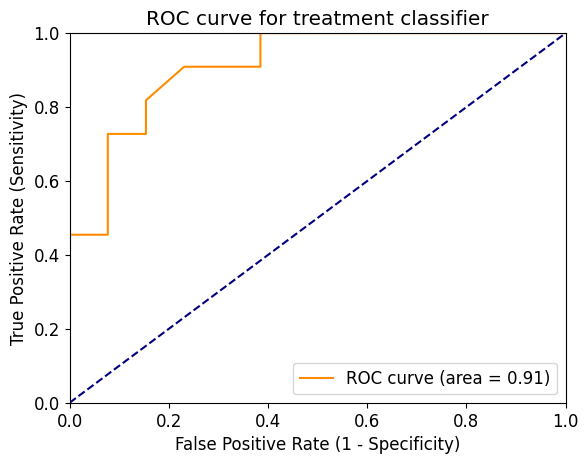

[[12  1]
 [ 3  8]]
Model Accuracy: 0.8333333333333334


In [ ]:
# Step 1: Upload the dataset to Colab
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded.keys())))

# Step 2: Define the feature columns based on the dataset
feature_cols = [
    'Age', 'Gender', 'Screen_time  ', 'AnxietyAboutMissingUpdates',
    'DifficultyStopping', 'StressAnxietyAfterUse', 'FrequencyOfSadness',
    'HeadachesEyeStrain', 'TroubleSleeping', 'FeelingIsolated'
]

# Define the target variable
X = df[feature_cols]
y = df['Treatment']

# Encode the target variable
y = y.map({'Yes': 1, 'No': 0})

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Step 3: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Step 4: Build a model and evaluate it
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Define the evaluation function
def evalClassModel(model, X_test, y_test, y_pred_class, plot=False):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    print('Cross-validated AUC:', cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class membership:\n', model.predict_proba(X_test)[0:10])

    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.show()

    # Instead of using binarize, use numpy to apply the threshold
    y_pred_class = (y_pred_prob > 0.3).astype(int)

    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)

    return accuracy

# Fit the Extra Trees model and make predictions
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X_train, y_train)
y_pred_class = forest.predict(X_test)

# Evaluate the model
accuracy = evalClassModel(forest, X_test, y_test, y_pred_class, plot=True)
print(f"Model Accuracy: {accuracy}")


Saving mhp_Children.csv to mhp_Children (10).csv
Accuracy: 0.6666666666666666
Null accuracy:
 Treatment
0    13
1    11
Name: count, dtype: int64
Percentage of ones: 0.4583333333333333
Percentage of zeros: 0.5416666666666667
True: [0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1]
Pred: [0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0]


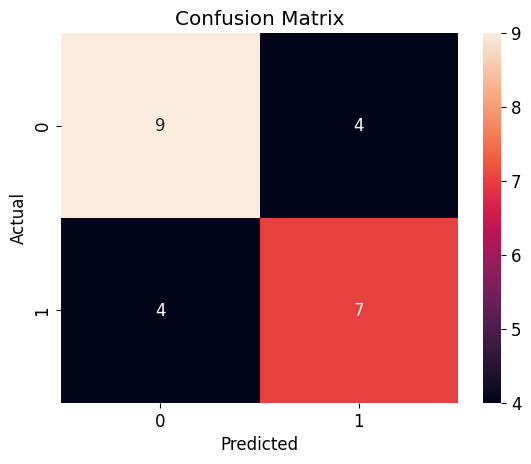

Classification Accuracy: 0.6666666666666666
Classification Error: 0.33333333333333337
False Positive Rate: 0.3076923076923077
Precision: 0.6363636363636364
AUC Score: 0.6643356643356643
Cross-validated AUC: 0.8972222222222221
First 10 predicted responses:
 [0 0 1 1 0 1 1 1 0 1]
First 10 predicted probabilities of class membership:
 [[0.50512724 0.49487276]
 [0.8363544  0.1636456 ]
 [0.30323982 0.69676018]
 [0.08737708 0.91262292]
 [0.89296535 0.10703465]
 [0.34737442 0.65262558]
 [0.09052521 0.90947479]
 [0.4514991  0.5485009 ]
 [0.80213256 0.19786744]
 [0.2740151  0.7259849 ]]


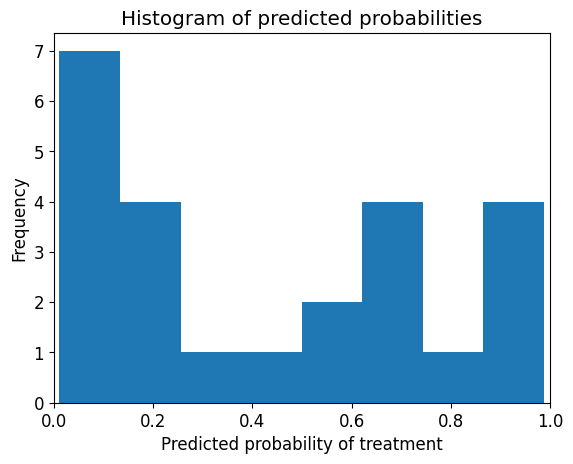

First 10 predicted probabilities:
 [0.49487276 0.1636456  0.69676018 0.91262292 0.10703465 0.65262558
 0.90947479 0.5485009  0.19786744 0.7259849 ]


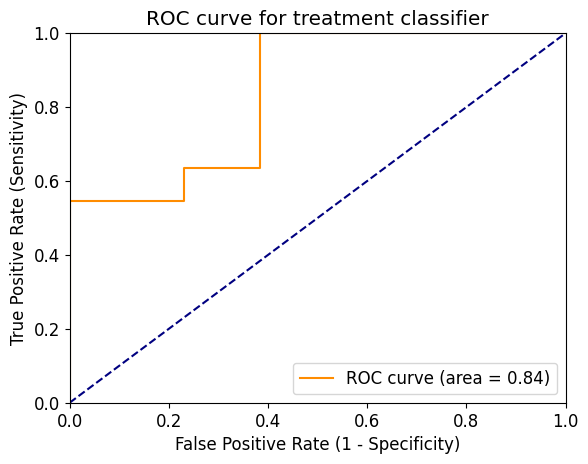

[[9 4]
 [4 7]]
Model Accuracy: 0.6666666666666666


In [ ]:
# Step 1: Upload the dataset to Colab
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded.keys())))

# Step 2: Define the feature columns based on the dataset
feature_cols = [
    'Age', 'Gender', 'Screen_time  ', 'AnxietyAboutMissingUpdates',
    'DifficultyStopping', 'StressAnxietyAfterUse', 'FrequencyOfSadness',
    'HeadachesEyeStrain', 'TroubleSleeping', 'FeelingIsolated'
]

# Define the target variable
X = df[feature_cols]
y = df['Treatment']

# Encode the target variable
y = y.map({'Yes': 1, 'No': 0})

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Step 3: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Step 4: Build a model and evaluate it
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Define the evaluation function
def evalClassModel(model, X_test, y_test, y_pred_class, plot=False):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    print('Cross-validated AUC:', cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class membership:\n', model.predict_proba(X_test)[0:10])

    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.show()

    y_pred_class = (y_pred_prob > 0.3).astype(int)

    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)

    return accuracy

# Fit the Logistic Regression model and make predictions
logreg = LogisticRegression(max_iter=10000, random_state=0)
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)

# Evaluate the model
accuracy = evalClassModel(logreg, X_test, y_test, y_pred_class, plot=True)
print(f"Model Accuracy: {accuracy}")


Saving mhp_Children.csv to mhp_Children (12).csv
Accuracy: 0.7916666666666666
Null accuracy:
 Treatment
0    13
1    11
Name: count, dtype: int64
Percentage of ones: 0.4583333333333333
Percentage of zeros: 0.5416666666666667
True: [0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1]
Pred: [0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0]


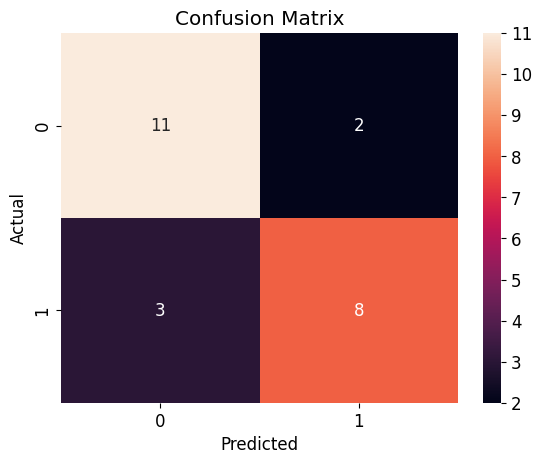

Classification Accuracy: 0.7916666666666666
Classification Error: 0.20833333333333337
False Positive Rate: 0.15384615384615385
Precision: 0.8
AUC Score: 0.7867132867132867
Cross-validated AUC: 0.9277777777777778
First 10 predicted responses:
 [0 0 1 1 0 0 1 0 0 1]
First 10 predicted probabilities of class membership:
 [[0.78 0.22]
 [0.61 0.39]
 [0.49 0.51]
 [0.1  0.9 ]
 [0.9  0.1 ]
 [0.53 0.47]
 [0.16 0.84]
 [0.68 0.32]
 [0.59 0.41]
 [0.35 0.65]]


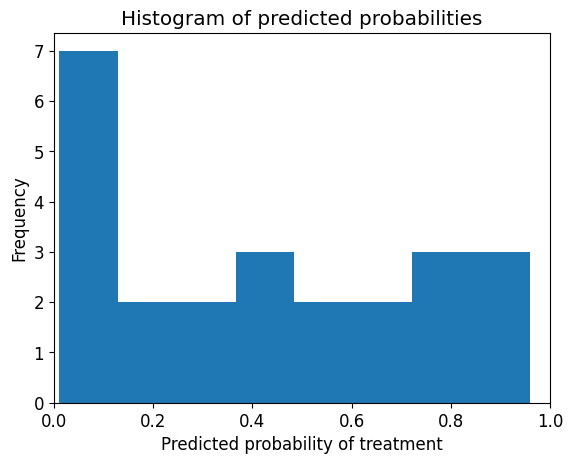

First 10 predicted probabilities:
 [0.22 0.39 0.51 0.9  0.1  0.47 0.84 0.32 0.41 0.65]


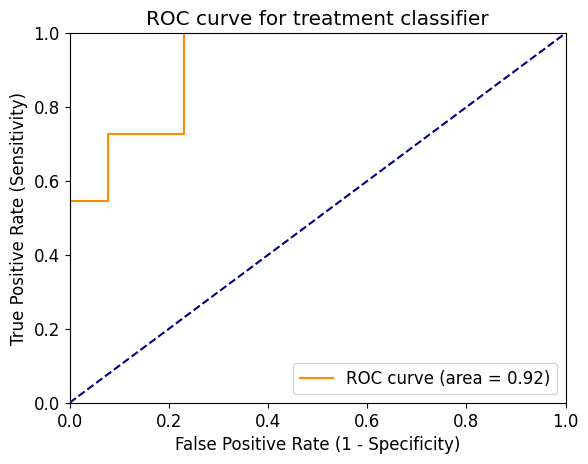

[[11  2]
 [ 3  8]]
Model Accuracy: 0.7916666666666666


In [ ]:
# Step 1: Upload the dataset to Colab
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded.keys())))

# Step 2: Define the feature columns based on the dataset
feature_cols = [
    'Age', 'Gender', 'Screen_time  ', 'AnxietyAboutMissingUpdates',
    'DifficultyStopping', 'StressAnxietyAfterUse', 'FrequencyOfSadness',
    'HeadachesEyeStrain', 'TroubleSleeping', 'FeelingIsolated'
]

# Define the target variable
X = df[feature_cols]
y = df['Treatment']

# Encode the target variable
y = y.map({'Yes': 1, 'No': 0})

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Step 3: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Step 4: Build a Random Forest model and evaluate it
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Define the evaluation function
def evalClassModel(model, X_test, y_test, y_pred_class, plot=False):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    print('Cross-validated AUC:', cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class membership:\n', model.predict_proba(X_test)[0:10])

    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.show()

    y_pred_class = (y_pred_prob > 0.3).astype(int)

    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)

    return accuracy

# Fit the Random Forest model and make predictions
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_class = rf.predict(X_test)

# Evaluate the model
accuracy = evalClassModel(rf, X_test, y_test, y_pred_class, plot=True)
print(f"Model Accuracy: {accuracy}")

Saving mhp_Children.csv to mhp_Children (13).csv
Accuracy: 0.8333333333333334
Null accuracy:
 Treatment
0    13
1    11
Name: count, dtype: int64
Percentage of ones: 0.4583333333333333
Percentage of zeros: 0.5416666666666667
True: [0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1]
Pred: [0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0]


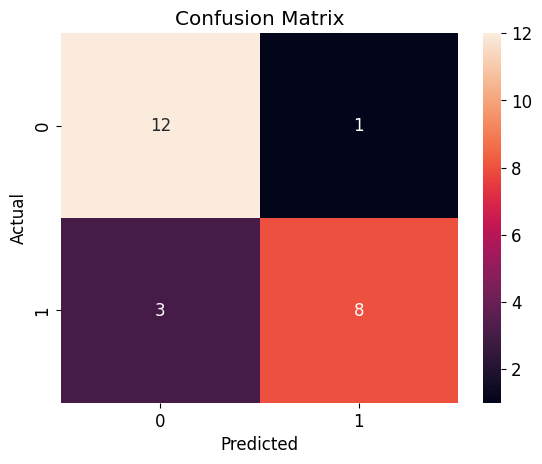

Classification Accuracy: 0.8333333333333334
Classification Error: 0.16666666666666663
False Positive Rate: 0.07692307692307693
Precision: 0.8888888888888888
AUC Score: 0.8251748251748253
Cross-validated AUC: 0.7458333333333333
First 10 predicted responses:
 [0 0 0 1 0 0 1 0 0 1]
First 10 predicted probabilities of class membership:
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


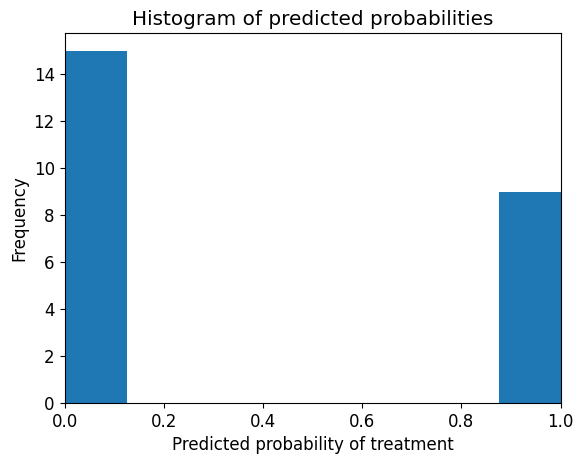

First 10 predicted probabilities:
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]


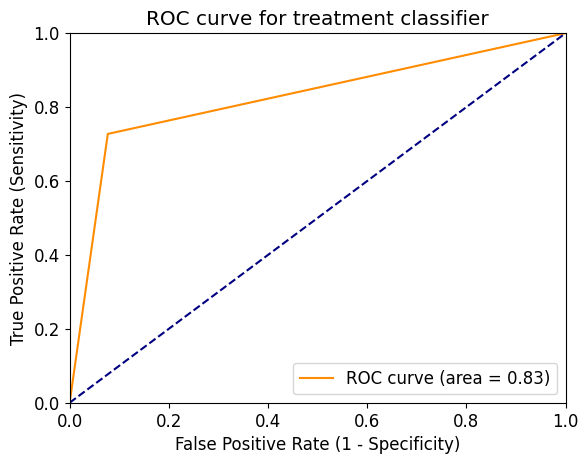

[[12  1]
 [ 3  8]]
Model Accuracy: 0.8333333333333334


In [ ]:
# Step 1: Upload the dataset to Colab
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded.keys())))

# Step 2: Define the feature columns based on the dataset
feature_cols = [
    'Age', 'Gender', 'Screen_time  ', 'AnxietyAboutMissingUpdates',
    'DifficultyStopping', 'StressAnxietyAfterUse', 'FrequencyOfSadness',
    'HeadachesEyeStrain', 'TroubleSleeping', 'FeelingIsolated'
]

# Define the target variable
X = df[feature_cols]
y = df['Treatment']

# Encode the target variable
y = y.map({'Yes': 1, 'No': 0})

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Step 3: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Step 4: Build a Decision Tree model and evaluate it
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Define the evaluation function
def evalClassModel(model, X_test, y_test, y_pred_class, plot=False):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    print('Cross-validated AUC:', cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class membership:\n', model.predict_proba(X_test)[0:10])

    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.show()

    y_pred_class = (y_pred_prob > 0.3).astype(int)

    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)

    return accuracy

# Fit the Decision Tree model and make predictions
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred_class = dt.predict(X_test)

# Evaluate the model
accuracy = evalClassModel(dt, X_test, y_test, y_pred_class, plot=True)
print(f"Model Accuracy: {accuracy}")

Saving mhp_Children.csv to mhp_Children (14).csv
Accuracy: 0.75
Null accuracy:
 Treatment
0    13
1    11
Name: count, dtype: int64
Percentage of ones: 0.4583333333333333
Percentage of zeros: 0.5416666666666667
True: [0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1]
Pred: [0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0]


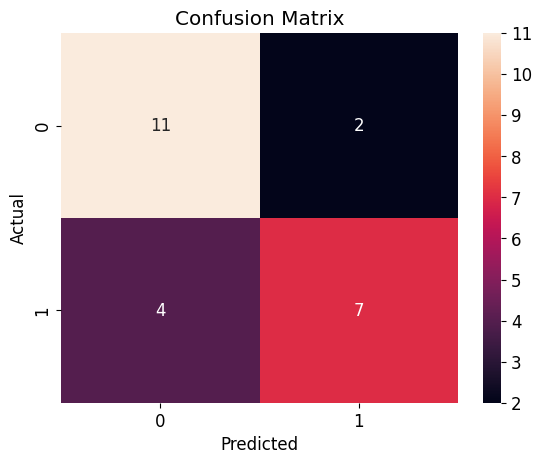

Classification Accuracy: 0.75
Classification Error: 0.25
False Positive Rate: 0.15384615384615385
Precision: 0.7777777777777778
AUC Score: 0.7412587412587412
Cross-validated AUC: 0.8173611111111111
First 10 predicted responses:
 [0 0 1 1 0 0 1 0 1 1]
First 10 predicted probabilities of class membership:
 [[1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [0.  1. ]
 [1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.4 0.6]]


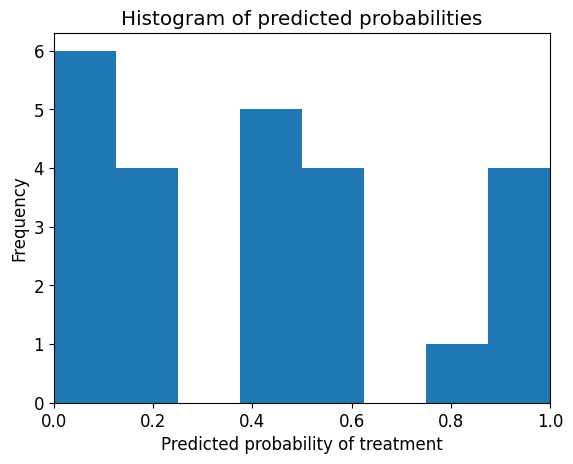

First 10 predicted probabilities:
 [0.  0.4 0.8 1.  0.  0.2 1.  0.2 0.6 0.6]


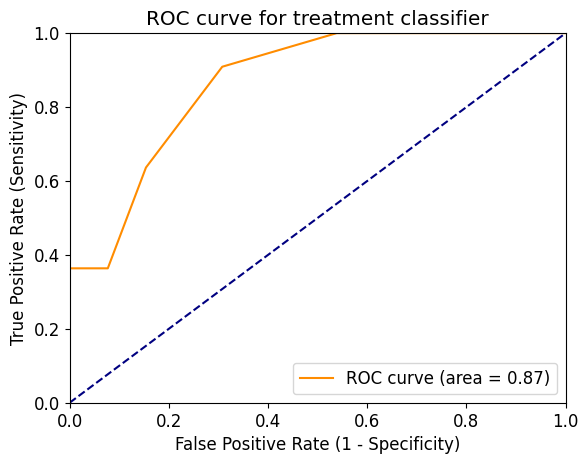

[[11  2]
 [ 4  7]]
Model Accuracy: 0.75


In [ ]:
# Step 1: Upload the dataset to Colab
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded.keys())))

# Step 2: Define the feature columns based on the dataset
feature_cols = [
    'Age', 'Gender', 'Screen_time  ', 'AnxietyAboutMissingUpdates',
    'DifficultyStopping', 'StressAnxietyAfterUse', 'FrequencyOfSadness',
    'HeadachesEyeStrain', 'TroubleSleeping', 'FeelingIsolated'
]

# Define the target variable
X = df[feature_cols]
y = df['Treatment']

# Encode the target variable
y = y.map({'Yes': 1, 'No': 0})

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Step 3: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Step 4: Build a KNN model and evaluate it
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Define the evaluation function
def evalClassModel(model, X_test, y_test, y_pred_class, plot=False):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:', 1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    print('Cross-validated AUC:', cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean())

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class membership:\n', model.predict_proba(X_test)[0:10])

    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot:
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)
        plt.xlim(0, 1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
        plt.show()

    y_pred_class = (y_pred_prob > 0.3).astype(int)

    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])

    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    def evaluate_threshold(threshold):
        print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)

    return accuracy

# Fit the KNN model and make predictions
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

# Evaluate the model
accuracy = evalClassModel(knn, X_test, y_test, y_pred_class, plot=True)
print(f"Model Accuracy: {accuracy}")

Saving mhp_Children.csv to mhp_Children (15).csv
Mean Squared Error: 0.29295284471300526
Root Mean Squared Error: 0.5412511844910876
R-squared: -0.18000586401881824
Cross-validated R-squared: 0.13775184810759528


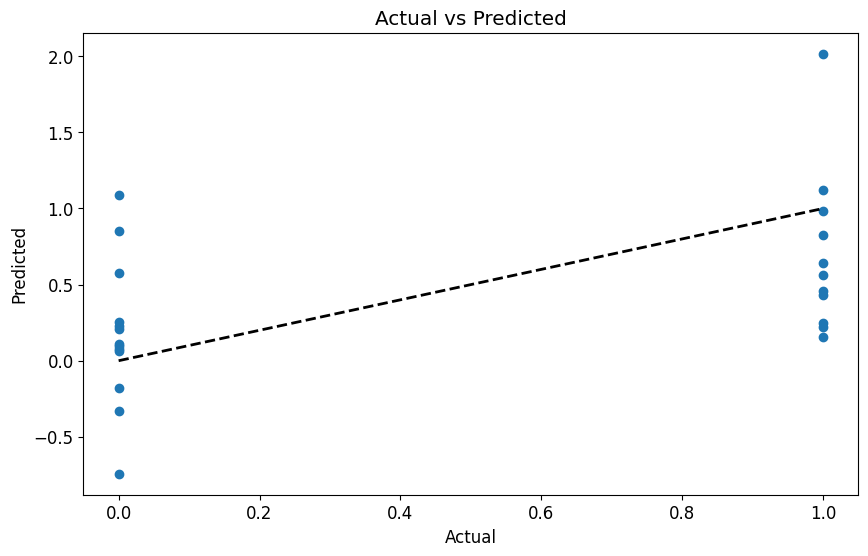

In [ ]:
# Step 1: Upload the dataset to Colab
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Load the dataset
df = pd.read_csv(next(iter(uploaded.keys())))

# Step 2: Define the feature columns based on the dataset
feature_cols = [
    'Age', 'Gender', 'Screen_time  ', 'AnxietyAboutMissingUpdates',
    'DifficultyStopping', 'StressAnxietyAfterUse', 'FrequencyOfSadness',
    'HeadachesEyeStrain', 'TroubleSleeping', 'FeelingIsolated'
]

# Define the target variable
X = df[feature_cols]
y = df['Treatment']

# Encode the target variable
y = y.map({'Yes': 1, 'No': 0})

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Step 3: Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Step 4: Build a Linear Regression model and evaluate it
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Define the evaluation function
def evalRegressionModel(model, X_test, y_test, y_pred, plot=False):
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R-squared:', metrics.r2_score(y_test, y_pred))
    print('Cross-validated R-squared:', cross_val_score(model, X, y, cv=10, scoring='r2').mean())

    if plot:
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted')
        plt.show()

# Fit the Linear Regression model and make predictions
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the model
evalRegressionModel(lr, X_test, y_test, y_pred, plot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split the data into X_train, X_test, y_train, y_test

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate the models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append([name, accuracy])

# Create a table to compare the results
import pandas as pd

comparison_table = pd.DataFrame(results, columns=['Algorithm', 'Accuracy'])
comparison_table = comparison_table.sort_values(by='Accuracy', ascending=False)

print(comparison_table)

             Algorithm  Accuracy
1        Decision Tree  0.833333
2        Random Forest  0.833333
3                  KNN  0.750000
0  Logistic Regression  0.666667


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is named 'mhp_Children.csv'
data = pd.read_csv('mhp_Children.csv')

# Display the column names
print(data.columns)



Saving mhp_Children.csv to mhp_Children (1).csv
Index(['Name', 'Age', 'Gender', 'Screen_time  ', 'social _media _platforms ',
       'AnxietyAboutMissingUpdates', 'ActivitiesOnSocialMedia  ',
       'TimeOfDayUsage', 'CheckFrequency  ', 'DifficultyStopping',
       'ConcentrationAfterUse', 'AcademicImpact', 'NeglectResponsibilities',
       'UseDuringMeals', 'PressureToRespond', 'InPersonVsOnlineInteraction',
       'StressAnxietyAfterUse', 'FrequencyOfSadness', 'HeadachesEyeStrain',
       'TroubleSleeping', 'FeelingIsolated', 'ComparisonToOthers',
       'TalkAboutFeelings', 'RelaxationActivities', 'Unnamed: 24',
       'Treatment'],
      dtype='object')


Classifier Metrics Comparison:
               Classifier  Accuracy  Error  False Positive Rate  Precision  \
0    KNeighborsClassifier    0.7500 0.2500               0.1538     0.7778   
1  DecisionTreeClassifier    0.8333 0.1667               0.0769     0.8889   
2  RandomForestClassifier    0.7917 0.2083               0.1538     0.8000   
3      LogisticRegression    0.6667 0.3333               0.3077     0.6364   

   AUC Score  
0     0.7413  
1     0.8252  
2     0.7867  
3     0.6643  


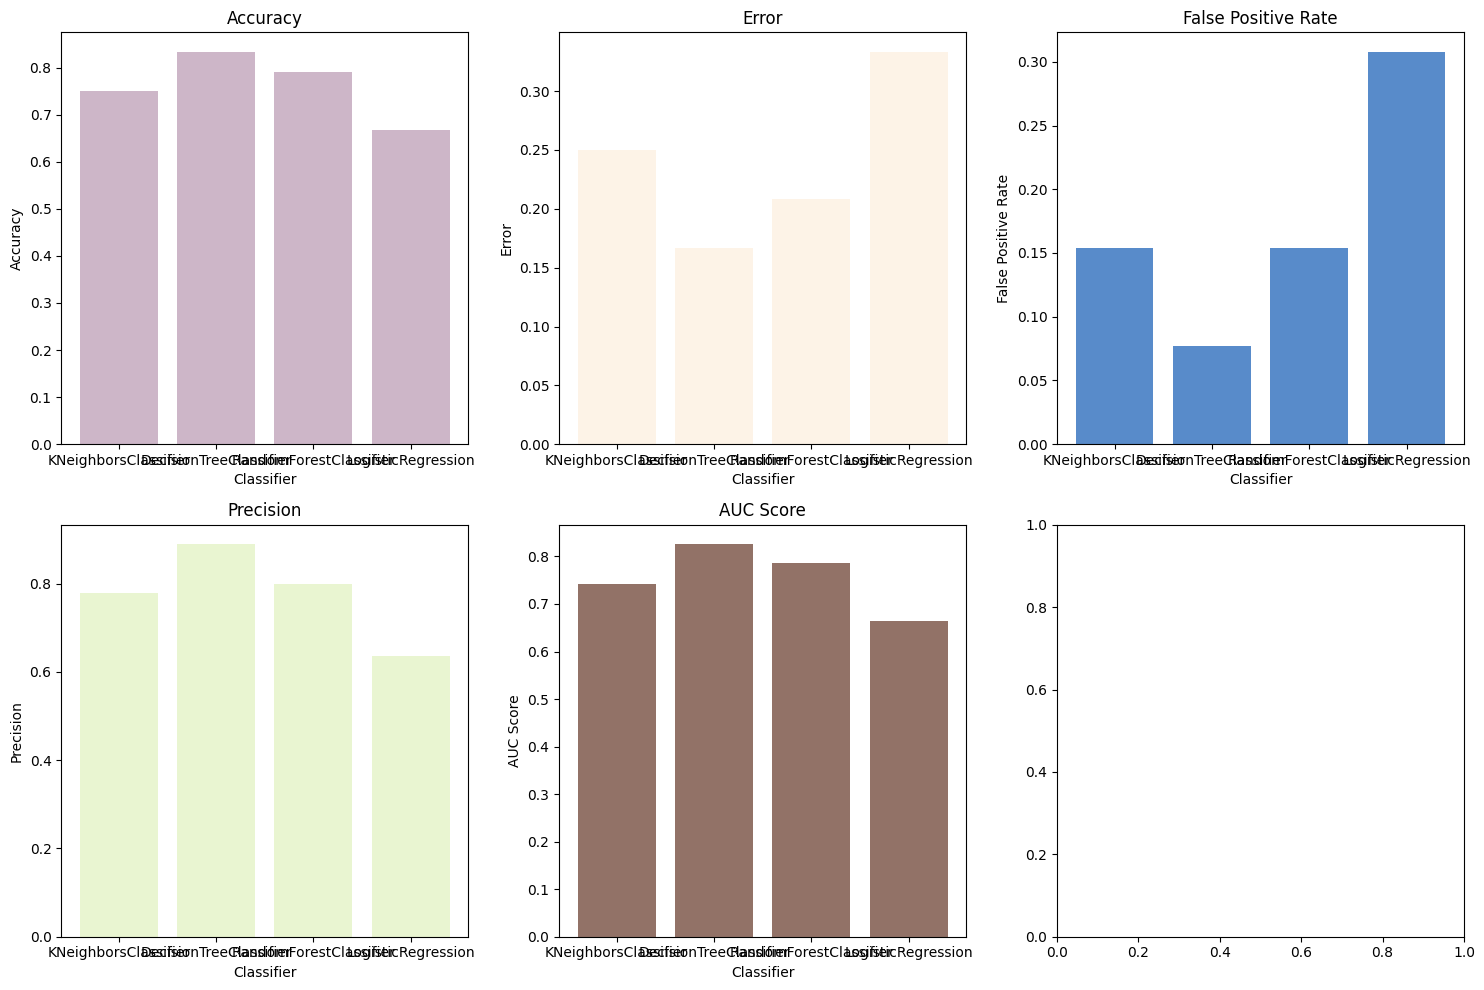

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Classifier names and their metrics
classifiers = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression']
accuracy = [0.75, 0.8333, 0.7917, 0.6667]
error = [0.25, 0.1667, 0.2083, 0.3333]
false_positive_rate = [0.1538, 0.0769, 0.1538, 0.3077]
precision = [0.7778, 0.8889, 0.8, 0.6364]
auc_score = [0.7413, 0.8252, 0.7867, 0.6643]

# Create a DataFrame
data = {
    'Classifier': classifiers,
    'Accuracy': accuracy,
    'Error': error,
    'False Positive Rate': false_positive_rate,
    'Precision': precision,
    'AUC Score': auc_score
}
df = pd.DataFrame(data)

# Display table
print("Classifier Metrics Comparison:")
print(df)

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plotting metrics
for i, metric in enumerate(['Accuracy', 'Error', 'False Positive Rate', 'Precision', 'AUC Score']):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.bar(classifiers, df[metric], color=np.random.rand(4,))
    ax.set_title(metric)
    ax.set_xlabel('Classifier')
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()


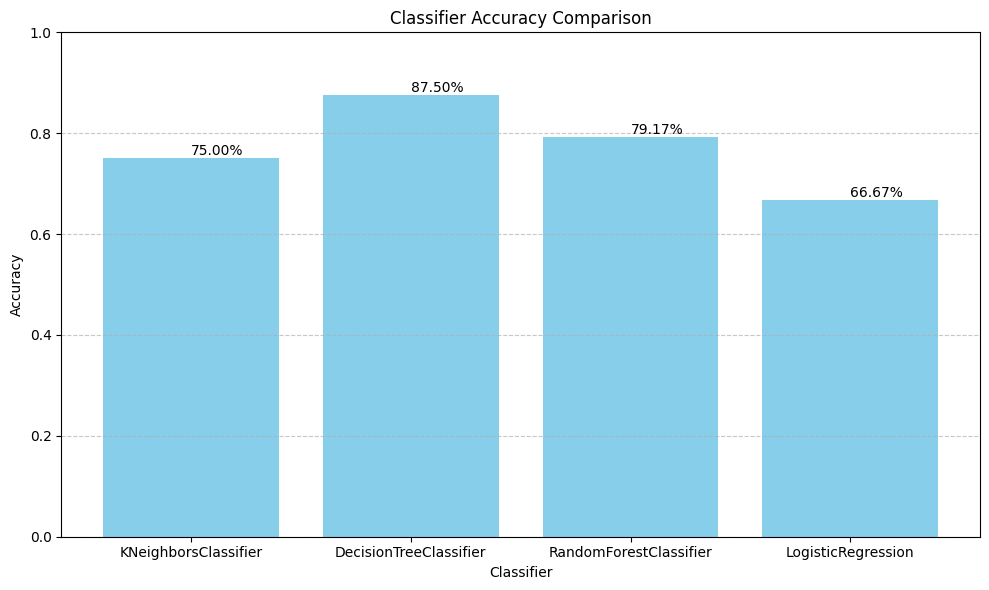

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Classifier names and their accuracy
classifiers = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression']
accuracy = [0.75, 0.875, 0.7917, 0.6667]

# Create a DataFrame
data = {
    'Classifier': classifiers,
    'Accuracy': accuracy
}
df = pd.DataFrame(data)

# Plotting Accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Classifier'], df['Accuracy'], color='skyblue')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2%}', va='bottom')  # va: vertical alignment

# Display the plot
plt.tight_layout()
plt.show()
